In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss,roc_curve,roc_auc_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

### **ROC_AUC  can only be used for binary classifier**

In [4]:
cancer=pd.read_csv('BreastCancer.csv',index_col='Code')

In [6]:
lbl=LabelEncoder()
cancer['Class']=lbl.fit_transform(cancer['Class'])

In [7]:
cancer.head()

Clump  UniCell_Size  Uni_CellShape  MargAdh  SEpith  BareN  \
Code                                                                 
61634       5             4              3        1       2      2   
63375       9             1              2        6       4     10   
76389      10             4              7        2       2      8   
95719       6            10             10       10       8     10   
128059      1             1              1        1       2      5   

        BChromatin  NoemN  Mitoses  Class  
Code                                       
61634            2      3        1      0  
63375            7      7        2      1  
76389            6      1        1      1  
95719            7     10        7      1  
128059           5      1        1      0

In [8]:
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=23)

In [10]:
lr=LogisticRegression()

In [11]:
lr.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred_prob=lr.predict_proba(X_test)[:,1]
y_pred_prob

array([9.99842690e-01, 8.06464477e-03, 3.48047996e-03, 6.56308203e-03,
       1.91479931e-03, 8.06464477e-03, 1.56623260e-02, 7.76864168e-04,
       2.88659658e-04, 4.47292171e-03, 5.18968318e-04, 1.22215588e-03,
       4.73577783e-04, 7.29723027e-01, 2.22484625e-02, 1.52982506e-03,
       3.01038037e-03, 7.47344886e-01, 9.70066459e-01, 1.00322071e-03,
       5.64713520e-04, 1.67628288e-03, 7.42280063e-03, 1.52982506e-03,
       2.88659658e-04, 5.78262166e-02, 9.36639832e-01, 9.99499616e-01,
       9.98196331e-01, 4.48985980e-02, 4.23773982e-03, 6.24891027e-04,
       1.39614544e-03, 9.32858516e-04, 9.99463083e-01, 6.20531824e-04,
       5.59446684e-01, 2.45287256e-03, 7.76864168e-04, 9.99962658e-01,
       4.73577783e-04, 9.99231629e-01, 2.88659658e-04, 3.48047996e-03,
       9.99991409e-01, 2.50785098e-03, 9.93275718e-01, 9.93688663e-01,
       6.20531824e-04, 2.98962441e-03, 4.93026002e-03, 9.90118648e-01,
       8.51298730e-04, 1.52982506e-03, 3.78254204e-04, 7.76864168e-04,
      

In [17]:
fpr,tpr,thres=roc_curve(y_test,y_pred_prob)

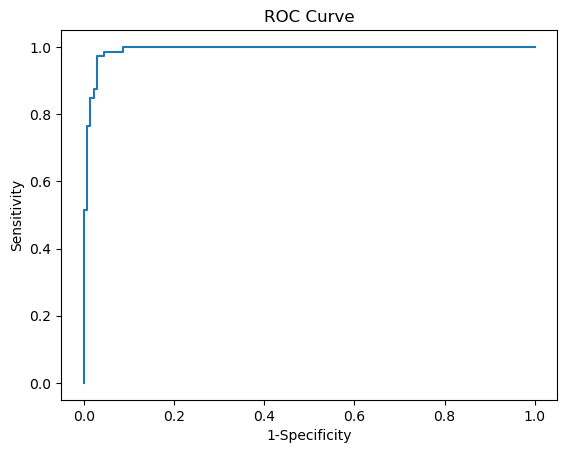

In [18]:
plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.ylabel("Sensitivity")
plt.xlabel("1-Specificity")
plt.show()

In [19]:
## AUC
print(roc_auc_score(y_test,y_pred_prob))

0.9917471819645732


In [21]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
penalty={'penalty':['l1', 'l2', 'elasticnet', None],
         'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
gcv=GridSearchCV(lr,param_grid=penalty,cv=kfold,scoring='roc_auc')
gcv.fit(X,y)

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:35

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [22]:
print(gcv.best_params_)

{'penalty': 'l2', 'solver': 'lbfgs'}


In [23]:
print(gcv.best_score_)

0.9938674854796193


### ROC_AUC for Multiclass classifier

In [27]:
image = pd.read_csv('Image_Segmention.csv')

In [28]:
lbl=LabelEncoder()
image['Class']=lbl.fit_transform(image['Class'])
lbl.classes_

array(['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'],
      dtype=object)

In [29]:
X=image.drop("Class",axis=1)
y=image['Class']roc_auc_score(y_test,y_pred_prob,multi_class='ovr')

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_prob = lr.predict_proba(X_test)
print(log_loss(y_test,y_pred_prob))

0.27163401168459117


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# AUC OVR

In [32]:
roc_auc_score(y_test,y_pred_prob,multi_class='ovr')

0.9882422104644327

In [33]:
roc_auc_score(y_test,y_pred_prob,multi_class='ovo')

0.9882422104644326